Series to dict and back to Series

In [1]:
import pandas as pd
import numpy as np

In [37]:
lables = ['a', 'b', 'c', 'd', 'e']

s = pd.Series(np.random.randn(5), index = lables) # two arrays or actually one numpy array and one list
s

a    0.562882
b    0.612152
c    1.451828
d   -1.137458
e   -0.318864
dtype: float64

A Series behaves much like a dictonary

In [43]:
print 'b' in s

print s['b']
print s[:3] # gives a two dimensional array back -- different behavior in contrast to a list

print s.index

True
0.612152202076
b    0.612152
a    0.562882
e   -0.318864
dtype: float64
Index([u'b', u'a', u'e', u'c', u'd'], dtype='object')


Converting a Series to a dict is easy

In [38]:
mapping = s.to_dict()
mapping

{'a': 0.56288216734337215,
 'b': 0.61215220207640775,
 'c': 1.4518281000543602,
 'd': -1.1374577043707095,
 'e': -0.31886380288902633}

Or to any other format

In [23]:
mapping = s.to_csv('fun.csv', sep=';') # creates file and writes it to current path
print mapping

mapping = s.to_json()
print mapping

{"a":0.1658698568,"b":1.7823510422,"c":0.6223325426,"d":-0.7834796916,"e":-0.0966416785}
None


Converting dict to Series

In [40]:
s = pd.Series(mapping)
s

# could alternatively change the order

s = pd.Series(mapping, index = ['b', 'a', 'e', 'c', 'd'])
s

b    0.612152
a    0.562882
e   -0.318864
c    1.451828
d   -1.137458
dtype: float64

# DataFrame: 2D collection of Series 

In [51]:
df = pd.DataFrame ({ 'a': np.random.randn(6),
                     'b': ['foo', 'bar']*3,
                     'c': np.random.randn(6)
                   })

df['d'] = range(6) # add a list 

df

,a,b,c,d
0,0.022035,foo,-0.856374,0
1,-0.676350,bar,-0.504788,1
2,-1.898579,foo,-0.569872,2
3,1.368731,bar,-0.884271,3
4,-1.398886,foo,-0.492838,4
5,0.539805,bar,-0.465258,5


In [52]:
print df.index

print df.columns

print df['c']

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')
Index([u'a', u'b', u'c', u'd'], dtype='object')
0   -0.856374
1   -0.504788
2   -0.569872
3   -0.884271
4   -0.492838
5   -0.465258
Name: c, dtype: float64


In [58]:
print df.ix[0] # first column

# specific value

print df.ix[2, 'b']

# subsets

print df.ix[2:4 , ['b', 'c']]

# subsets with condition

print df.ix[df['d'] > 2, ['a', 'c', 'd']]

a    0.02203542
b           foo
c    -0.8563737
d             0
Name: 0, dtype: object
foo
     b         c
2  foo -0.569872
3  bar -0.884271
4  foo -0.492838
          a         c  d
3  1.368731 -0.884271  3
4 -1.398886 -0.492838  4
5  0.539805 -0.465258  5


In [95]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline  

iris = load_iris().data
#X = iris.data 
X = pd.DataFrame(iris)

In [96]:
print(load_iris().keys())
columns = load_iris().feature_names
target_names = load_iris().target_names
y = load_iris().target
X = load_iris().data

['target_names', 'data', 'target', 'DESCR', 'feature_names']


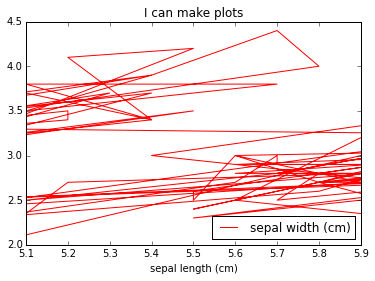

In [110]:
train = pd.DataFrame(data = X, columns = columns)
train['TARGET'] = y
train

train.plot(x='sepal length (cm)', y='sepal width (cm)', color = 'red', title = 'I can make plots')
#plt.plot(train['sepal length (cm)'], train['sepal width (cm)'])
#plt.title('I can make plots')

#x = np.linspace(0, 3*np.pi, 500)
#plt.plot(x, np.sin(x**2))
#plt.title('A simple chirp')
#plt.show()

In [119]:
plt.scatter(train['sepal length (cm)'].values, train['sepal width (cm)'].values)

AttributeError: 'module' object has no attribute 'scatter'

In [117]:
train['sepal length (cm)'].values

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

# iloc: 	Purely integer-location based indexing for selection by position

In [40]:
train.iloc[:5,:] # everything before , relates to rows - everything after, relates to colums

## or train.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
train.iloc[:5,:2]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
TARGET               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [43]:
train['test'] = -1
train.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET,test
0,5.1,3.5,1.4,0.2,0,-1
1,4.9,3.0,1.4,0.2,0,-1
2,4.7,3.2,1.3,0.2,0,-1
3,4.6,3.1,1.5,0.2,0,-1
4,5.0,3.6,1.4,0.2,0,-1


In [47]:
target_np = train['test'].values

# Creating a dataframe from lists

In [51]:
cities = ['Berlin', 'London', 'Rostock']
inhabitans = [300, 1000, 2]
money = [100, 500, 90]
list_lables = ['citiy', 'inhabitans', 'money']
list_cols = [cities, inhabitans, money]

## basically zipped = list(zip(list_keys, list_values))
zipped = list(zip(list_lables, list_cols))

print(zipped)
example = pd.DataFrame(dict(zipped))
example

[('citiy', ['Berlin', 'London', 'Rostock']), ('inhabitans', [300, 1000, 2]), ('money', [100, 500, 90])]


,citiy,inhabitans,money
0,Berlin,300,100
1,London,1000,500
2,Rostock,2,90


In [58]:
# can now also broadcast a dict to dataframe
time = [1, 0.5, 2.5]
fun = {'status':'cool', 'time_spend': time}

data = pd.DataFrame(fun)
data

  status  time_spend
0   cool         1.0
1   cool         0.5
2   cool         2.5
  column_1  column_2
0     cool       1.0
1     cool       0.5
2     cool       2.5


In [59]:
# rename it 

data.columns = ['column_1', 'column_2']
print(data)

  column_1  column_2
0     cool       1.0
1     cool       0.5
2     cool       2.5


AttributeError: 'module' object has no attribute 'show'